# TC Profiling Paper Plots

Manuel Peuster (manuel.peuster@uni-paderborn.de)

Plots that are used in paper (styling in optimized etc.).

In [2]:
# global settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
import matplotlib.ticker as ticker
sns.set_style("ticks")
sns.set_context({"figure.figsize": (4.5, 3)})

## Load data

Do this only once since our data sources can be multiple GB! Uncompressed files are much faster.

In [3]:
%time df = pd.read_pickle("data/2018-04-05-experiment_tc_paper_synthetic_all.combined.pkl")

CPU times: user 9.93 s, sys: 8.18 s, total: 18.1 s
Wall time: 18.1 s


In [4]:
print("Selectors:")
print(list(set(list(df["selector_conf"]))))
print("\n\nPredictors:")
print(list(set(list(df["predictor_conf"]))))


Selectors:
['WVS_bpm=2-bpmp=False-pspv=10-smmm=2', 'WVS_bpm=1-bpmp=False-pspv=10-smmm=2', 'WVS_bpm=0-bpmp=False-pspv=10-smmm=2', 'WVS_bpm=2-bpmp=False-pspv=10-smmm=1', 'PGAS_mbp=20', 'URS', 'WVS_bpm=2-bpmp=False-pspv=10-smmm=0', 'WVS_bpm=2-bpmp=True-pspv=10-smmm=2', 'PGAS_mbp=10']


Predictors:
['SVRPLK_a=0.1-dgr=2-e=0.1-mtd=2', 'PRP_a=0.1-dgr=3-e=0.1-mtd=2', 'DTRP_a=0.1-dgr=2-e=0.1-mtd=5', 'SGDRP_a=0.0001-dgr=2-e=0.1-mtd=2', 'RRP_a=0.1-dgr=2-e=0.1-mtd=2', 'LRP_a=0.1-dgr=2-e=0.1-mtd=2', 'SVRPPK_a=0.1-dgr=2-e=0.1-mtd=2', 'SVRPRK_a=0.1-dgr=2-e=0.1-mtd=2', 'PRP_a=0.1-dgr=2-e=0.1-mtd=2']


## Common Helpers

In [25]:
def _cartesian_product(p_dict):
    """
    Compute Cartesian product on parameter dict:
    In:
        {"number": [1,2,3], "color": ["orange","blue"] }
    Out:
        [ {"number": 1, "color": "orange"},
          {"number": 1, "color": "blue"},
          {"number": 2, "color": "orange"},
          {"number": 2, "color": "blue"},
          {"number": 3, "color": "orange"},
          {"number": 3, "color": "blue"}
        ]
    """
    p_names = sorted(p_dict)
    return [dict(zip(p_names, prod)) for prod in it.product(
        *(p_dict[n] for n in p_names))]

def _generate_filters(df, column_lst):
    """
    config defines arbitrary column names over which we want to iterate
    to create multiple plots, we fetch the possible values of each column
    from the dataset, and compute a float list (cartesian_product) of
    configuration combinations to be plotted
    """
    # extract possible values
    filter_dict = dict()
    for column in column_lst:
        filter_dict[column] = list(set(df[column]))
    # all combinations
    return _cartesian_product(filter_dict)

def _filter_df_by_dict(df, filter_dict):
    """
    do some Pandas magic to dynamically filter df by given dict
    filter_dict = {"column1": "value", "column2": ...}
    """
    return df.loc[
         (df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]

def _get_selector_name(sconf):
    return sconf.split("_")[0]

def _get_error_name(err):
    if err == "MSE":
        return "mean squared error (MSE)"
    if err == "R":
        return "coefficient of determination ($R^2$)"
    return err

In [117]:
def error_plot(df, filter_dict,
                  title="selector comparison",
                  x="k_samples", y="error_value",
                  hue="selector_conf", # errors are based on this grouping
                  error_bars=95, # ="sd" or =95 (for ci)
                  y_limit=None,
                  x_label="k samples",
                  y_label="error",
                  fig_width=6,
                  fig_height=5,
                  legend_loc="upper right",
                  path=None):
    sns.set_style("ticks", rc={"legend.frameon": False})
    sns.set_context("paper",
                    font_scale=1.6,
                    rc={
                    "lines.linewidth": .7
                    })
    # filters (one filter per plot)
    if isinstance(filter_dict, dict):
        filter_dict_list = [filter_dict]
    else:
        filter_dict_list = filter_dict
    # iterate over all filters to gen. diff. plots
    for f in filter_dict_list:
        # select data to be plotted
        dff = _filter_df_by_dict(df, f)
        if len(dff) < 1:
            print("Filter {} returned 0 data entires.".format(f))
            continue  # nothing to plot
        print("Filtered plot data has {} entries".format(len(dff)))
        fig, ax = plt.subplots(
            figsize=(fig_width,
                     fig_height),
                     dpi=300)
        # do plot
        sns.pointplot(ax=ax,
                      data=dff,
                      x=x,
                      y=y,
                      hue=hue,
                      ci=error_bars,  # ci="sd" or ci=95
                      capsize=.3,
                      markers=["o", "s", "^", "v", "D", "p", "d", "P", "X" "*"],
                      linestyles=["-", "--", "-.", ":", "-", "--", "-.", ":"],
                      #palette="hls",
                      color="dimgray"  # "darkgray"=different grays
                     )

        # custom markers (seaborn does not support it well)
        plt.setp(ax.collections, sizes=[50], facecolor='none')  
        # create legend
        leg = ax.legend(loc=legend_loc)
        #fig.suptitle(title)
        ax.set_title(title)
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        if y_limit is not None:
            ax.set_ylim(y_limit)
        if path is not None:
            plt.savefig(path, bbox_inches="tight")
        plt.show()

## Predictor comparisson

Filtered plot data has 216000 entries


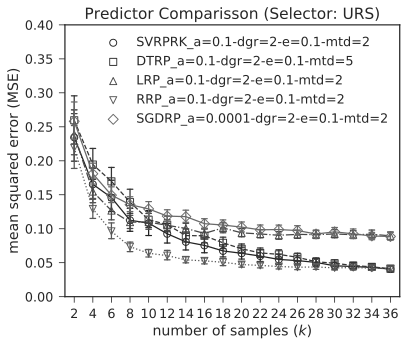

Filtered plot data has 216000 entries


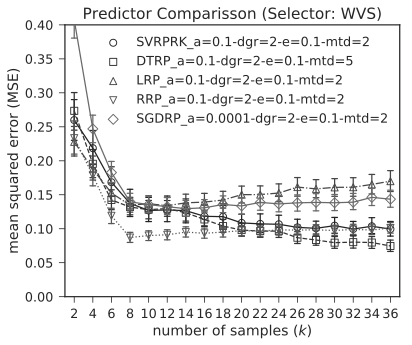

In [118]:
ERRORS = ["MSE"]#, "R"]
SELECTORS = [#'PGAS_mbp=10',
             #'WVS_bpm=2-bpmp=False-pspv=10-smmm=0',
             #'WVS_bpm=0-bpmp=False-pspv=10-smmm=2',
             'URS',
             #'PGAS_mbp=20',
             'WVS_bpm=1-bpmp=False-pspv=10-smmm=2',
             #'WVS_bpm=2-bpmp=False-pspv=10-smmm=1',
             #'WVS_bpm=2-bpmp=True-pspv=10-smmm=2',
             #'WVS_bpm=2-bpmp=False-pspv=10-smmm=2'
            ]

PREDICTORS = ['RRP_a=0.1-dgr=2-e=0.1-mtd=2',
             #'PRP_a=0.1-dgr=3-e=0.1-mtd=2',
             'SVRPRK_a=0.1-dgr=2-e=0.1-mtd=2',
             'DTRP_a=0.1-dgr=2-e=0.1-mtd=5',
             'LRP_a=0.1-dgr=2-e=0.1-mtd=2',
             #'PRP_a=0.1-dgr=2-e=0.1-mtd=2',
             #'SVRPPK_a=0.1-dgr=2-e=0.1-mtd=2',
             #'SVRPLK_a=0.1-dgr=2-e=0.1-mtd=2',
             'SGDRP_a=0.0001-dgr=2-e=0.1-mtd=2'
            ]


# remove poly predictors
dff = df[df["predictor_conf"].isin(PREDICTORS)]

# plot combined topologies
for sel in SELECTORS:
    for err in ERRORS:
        error_plot(
            dff,
            {
             "selector_conf": sel,
             "error": err
            },
            hue="predictor_conf",
            title="Predictor Comparisson (Selector: {})".format(_get_selector_name(sel)),
            x_label = "number of samples ($k$)",
            y_label = _get_error_name(err),
            y_limit=[-1.0, 1.0] if err == "R" else [0, .4],
            path="plots/predictor_comparisson_{}_{}.pdf".format(_get_selector_name(sel), err),
        )